In [56]:
!git clone https://github.com/ganesh0324/Digit-Recognizer

Cloning into 'Digit-Recognizer'...


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import cv2
import gradio as gr
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow  # For showing images in Colab

from tensorflow.keras.datasets import mnist

In [45]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

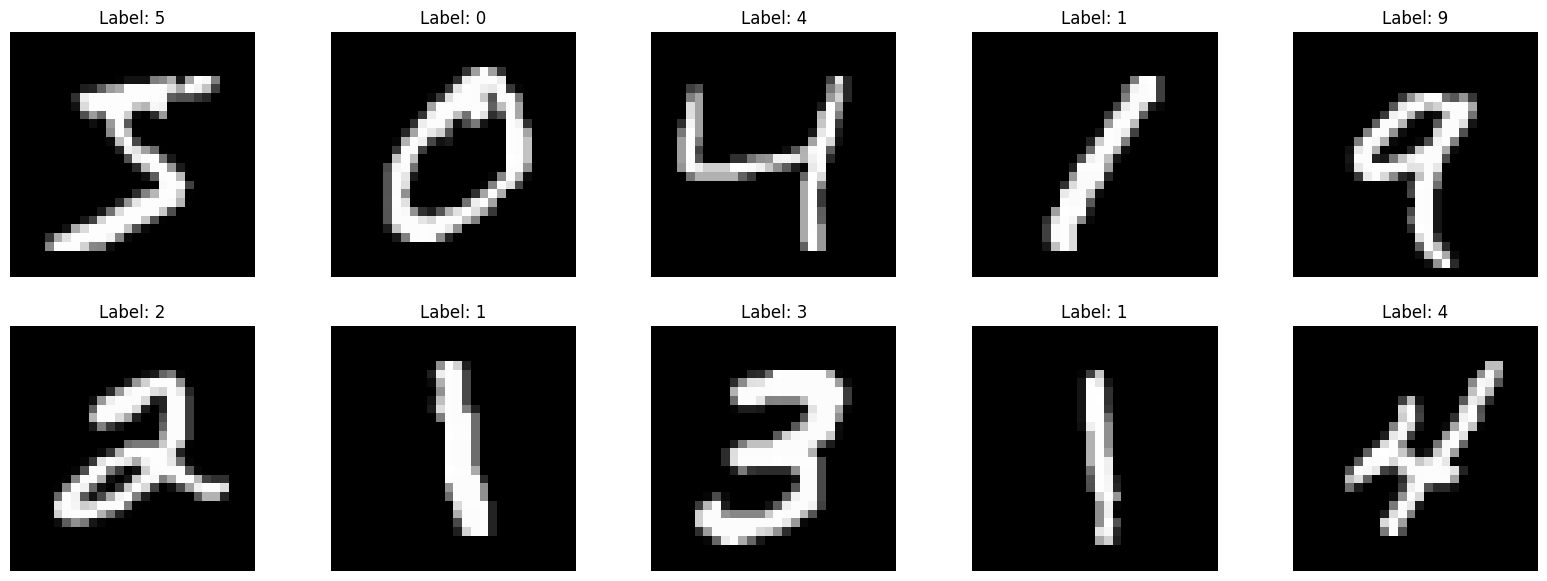

In [55]:
def plot_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(20, 7))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')  # Display image in grayscale
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train)

In [47]:
model = GaussianNB()

In [48]:
fit = model.fit(X_train, y_train)

In [49]:
pred = fit.predict(X_test)
con_matrix = confusion_matrix(y_test, pred)

In [50]:
from sklearn.metrics import accuracy_score, classification_report

print(f'Accuracy: {accuracy_score(y_test, pred):.2f}')
print(classification_report(y_test, pred))

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



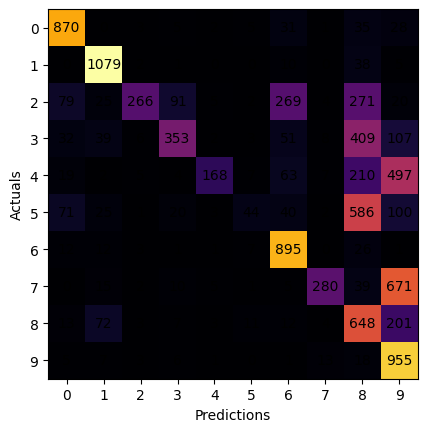

In [51]:
plt.imshow(con_matrix, cmap='inferno', interpolation='nearest')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
#show numbers too
for i in range(10):
  for j in range(10):
    plt.text(j, i, con_matrix[i, j], ha='center', va='center')
plt.show()

In [52]:
joblib.dump(model, 'naive_bayes_model1.pkl')

['naive_bayes_model1.pkl']